In [80]:
import pandas as pd
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import warnings
from sklearn.impute import KNNImputer
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
path = "/content/drive/MyDrive/DAT/GACTT_RESULTS_ANONYMIZED.csv"
data = pd.read_csv(path)

In [17]:
data.head()

,Submission ID,Respondent ID,Submitted at,What is your age?,What is your ZIP code?,How many cups of coffee do you typically drink per day?,Where do you typically drink coffee?,Where do you typically drink coffee? (At home),Where do you typically drink coffee? (At the office),Where do you typically drink coffee? (On the go),...,Gender,Gender (please specify),Marital Status,Household Income,Education Level,Ethnicity/Race,Ethnicity/Race (please specify),Employment Status,Number of Children,Political Affiliation
0,gMR29l,vDzkBA,9/11/23 20:50,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BkPN0e,9Z4VME,9/11/23 20:52,25-34 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,W5G8jj,XoNLQj,9/12/23 1:33,25-34 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4xWgGr,Gp7gde,9/12/23 12:58,35-44 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,QD27Q8,Bp9ogQ,9/12/23 15:24,25-34 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# 컬럼별 결측치
null_mean = data.isnull().mean()
print(null_mean)

Submission ID                      0.000000
Respondent ID                      0.000000
Submitted at                       0.000000
What is your age?                  0.007669
What is your ZIP code?             0.019297
                                     ...   
Ethnicity/Race                     0.154379
Ethnicity/Race (please specify)    0.974023
Employment Status                  0.154132
Number of Children                 0.788224
Political Affiliation              0.186294
Length: 118, dtype: float64


In [19]:
# 컬럼별 결측치 계산
null_mean = data.isnull().mean()
# 결측치 비율이 0.2 이하인 열만 사용
df = data.loc[:, null_mean < 0.20]

df.head()

,Submission ID,Respondent ID,Submitted at,What is your age?,What is your ZIP code?,How many cups of coffee do you typically drink per day?,Where do you typically drink coffee?,Where do you typically drink coffee? (At home),Where do you typically drink coffee? (At the office),Where do you typically drink coffee? (On the go),...,Do you feel like you’re getting good value for your money when you buy coffee at a cafe?,Approximately how much have you spent on coffee equipment in the past 5 years?,Do you feel like you’re getting good value for your money with regards to your coffee equipment?,Gender,Marital Status,Household Income,Education Level,Ethnicity/Race,Employment Status,Political Affiliation
0,gMR29l,vDzkBA,9/11/23 20:50,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BkPN0e,9Z4VME,9/11/23 20:52,25-34 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,W5G8jj,XoNLQj,9/12/23 1:33,25-34 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4xWgGr,Gp7gde,9/12/23 12:58,35-44 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,QD27Q8,Bp9ogQ,9/12/23 15:24,25-34 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
null_mean2 = df.isnull().mean()
print(null_mean2)

Submission ID             0.000000
Respondent ID             0.000000
Submitted at              0.000000
What is your age?         0.007669
What is your ZIP code?    0.019297
                            ...   
Household Income          0.185304
Education Level           0.149431
Ethnicity/Race            0.154379
Employment Status         0.154132
Political Affiliation     0.186294
Length: 72, dtype: float64


In [21]:
df.shape

(4042, 72)

In [22]:
# 전체 열 출력
df.columns.tolist()

['Submission ID',
 'Respondent ID',
 'Submitted at',
 'What is your age?',
 'What is your ZIP code?',
 'How many cups of coffee do you typically drink per day?',
 'Where do you typically drink coffee?',
 'Where do you typically drink coffee? (At home)',
 'Where do you typically drink coffee? (At the office)',
 'Where do you typically drink coffee? (On the go)',
 'Where do you typically drink coffee? (At a cafe)',
 'Where do you typically drink coffee? (None of these)',
 'How do you brew coffee at home?',
 'How do you brew coffee at home? (Pour over)',
 'How do you brew coffee at home? (French press)',
 'How do you brew coffee at home? (Espresso)',
 'How do you brew coffee at home? (Coffee brewing machine (e.g. Mr. Coffee))',
 'How do you brew coffee at home? (Pod/capsule machine (e.g. Keurig/Nespresso))',
 'How do you brew coffee at home? (Instant coffee)',
 'How do you brew coffee at home? (Bean-to-cup machine)',
 'How do you brew coffee at home? (Cold brew)',
 'How do you brew coffee

In [23]:
# 원하는 열을 리스트에 저장
columns_to_keep = [
  'Submission ID', 'Respondent ID', 'Submitted at', 'What is your age?', 'What is your ZIP code?',
  'How many cups of coffee do you typically drink per day?', 'Where do you typically drink coffee?',
  'How do you brew coffee at home?',
  'What is your favorite coffee drink?',
  'Do you usually add anything to your coffee?', 'Why do you drink coffee?',
  'Gender', 'Employment Status', 'Household Income', "What is the most you've ever paid for a cup of coffee?",
  "What is the most you'd ever be willing to pay for a cup of coffee?",
  'Do you feel like you’re getting good value for your money when you buy coffee at a cafe?',
  'Approximately how much have you spent on coffee equipment in the past 5 years?',
  'Do you feel like you’re getting good value for your money with regards to your coffee equipment?','Do you like the taste of coffee?'
]

In [24]:
# 선택된 열로 데이터셋 생성
df2 = df[columns_to_keep]

# 결과 확인
df2.head()

,Submission ID,Respondent ID,Submitted at,What is your age?,What is your ZIP code?,How many cups of coffee do you typically drink per day?,Where do you typically drink coffee?,How do you brew coffee at home?,What is your favorite coffee drink?,Do you usually add anything to your coffee?,Why do you drink coffee?,Gender,Employment Status,Household Income,What is the most you've ever paid for a cup of coffee?,What is the most you'd ever be willing to pay for a cup of coffee?,Do you feel like you’re getting good value for your money when you buy coffee at a cafe?,Approximately how much have you spent on coffee equipment in the past 5 years?,Do you feel like you’re getting good value for your money with regards to your coffee equipment?,Do you like the taste of coffee?
0,gMR29l,vDzkBA,9/11/23 20:50,18-24 years old,NaN,NaN,NaN,NaN,Regular drip coffee,No - just black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BkPN0e,9Z4VME,9/11/23 20:52,25-34 years old,NaN,NaN,NaN,Pod/capsule machine (e.g. Keurig/Nespresso),Iced coffee,"Sugar or sweetener, No - just black",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,W5G8jj,XoNLQj,9/12/23 1:33,25-34 years old,NaN,NaN,NaN,Bean-to-cup machine,Regular drip coffee,No - just black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4xWgGr,Gp7gde,9/12/23 12:58,35-44 years old,NaN,NaN,NaN,Coffee brewing machine (e.g. Mr. Coffee),Iced coffee,"No - just black, Cinnamon",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,QD27Q8,Bp9ogQ,9/12/23 15:24,25-34 years old,NaN,NaN,NaN,Pour over,Latte,No - just black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# 결측치 행 제거
df3 = df2.dropna()
df3.head()

,Submission ID,Respondent ID,Submitted at,What is your age?,What is your ZIP code?,How many cups of coffee do you typically drink per day?,Where do you typically drink coffee?,How do you brew coffee at home?,What is your favorite coffee drink?,Do you usually add anything to your coffee?,Why do you drink coffee?,Gender,Employment Status,Household Income,What is the most you've ever paid for a cup of coffee?,What is the most you'd ever be willing to pay for a cup of coffee?,Do you feel like you’re getting good value for your money when you buy coffee at a cafe?,Approximately how much have you spent on coffee equipment in the past 5 years?,Do you feel like you’re getting good value for your money with regards to your coffee equipment?,Do you like the taste of coffee?
34,ylqbBg,KVG007,10/21/23 17:12,45-54 years old,48105,2,"At home, At the office, At a cafe, On the go","Pour over, French press, Espresso",Regular drip coffee,No - just black,It tastes good,Male,Employed full-time,"$100,000 - $149,999",$4-$6,$8-$10,No,$500-$1000,Yes,Yes
41,YZzBdN,W8q0dk,10/21/23 17:19,25-34 years old,505415,2,"At home, At the office","Pour over, Espresso",Pourover,No - just black,"It tastes good, I need the caffeine",Male,Unemployed,"Under $25,000",$2-$4,More than $20,Yes,$50-$100,Yes,Yes
42,VZ17Z6,Ex60gl,10/21/23 17:19,35-44 years old,38138,1,"At the office, At home",Pour over,Iced coffee,No - just black,It tastes good,Male,Employed full-time,"$75,000 - $99,999",$10-$15,More than $20,Yes,$100-$300,Yes,Yes
43,RzBeZj,g9z4V4,10/21/23 17:21,45-54 years old,60538,More than 4,At home,"Pour over, French press, Pod/capsule machine (...",Pourover,No - just black,"It tastes good, I need the caffeine, I need th...",Male,Employed full-time,"$150,000 or more",$10-$15,$15-$20,Yes,$300-$500,Yes,Yes
46,WApbkQ,Q740Lg,10/21/23 17:30,35-44 years old,90210,2,"At a cafe, At home","Espresso, Pod/capsule machine (e.g. Keurig/Nes...",Cappuccino,"Milk, dairy alternative, or coffee creamer","I need the ritual, It tastes good",Male,Unemployed,"$150,000 or more",$6-$8,$4-$6,Yes,"More than $1,000",Yes,Yes


In [26]:
df3.shape

(2966, 20)

In [27]:
# 결측치가 하나라도 있으면 True, 없으면 False
print(df3.isnull().values.any())

False


#### 연령대별 커피 소비습관

##### 연령대별로 몇 잔의 커피를 마시는가?

In [32]:
coffee_by_age = pd.crosstab(df['What is your age?'], df['How many cups of coffee do you typically drink per day?'])
print(coffee_by_age)

How many cups of coffee do you typically drink per day?    1    2    3   4  \
What is your age?                                                            
18-24 years old                                          166  160   33  10   
25-34 years old                                          689  828  206  39   
35-44 years old                                          274  428  131  36   
45-54 years old                                           85  121   47  14   
55-64 years old                                           36   78   38  15   
<18 years old                                              6    7    1   0   
>65 years old                                             21   37   17   7   

How many cups of coffee do you typically drink per day?  Less than 1  \
What is your age?                                                      
18-24 years old                                                   70   
25-34 years old                                                  176   
35-44 yea

In [37]:
most_cup = coffee_by_age.idxmax(axis=1)
print(most_cup)

What is your age?
18-24 years old    1
25-34 years old    2
35-44 years old    2
45-54 years old    2
55-64 years old    2
<18 years old      2
>65 years old      2
dtype: object


In [34]:
# 카이제곱 검정
chi2, p, dof, expected = chi2_contingency(coffee_by_age)

print(f"Chi-Square Test Statistic: {chi2}")
print(f"P-value: {p}")

Chi-Square Test Statistic: 184.6107963118333
P-value: 3.593513859420044e-24


p-value가 0.05보다 작으면, 두 변수는 상관관계가 있다고 해석한다. -> 검정 결과, 연령대별로 마시는 커피 양은 상관관계가 있다.

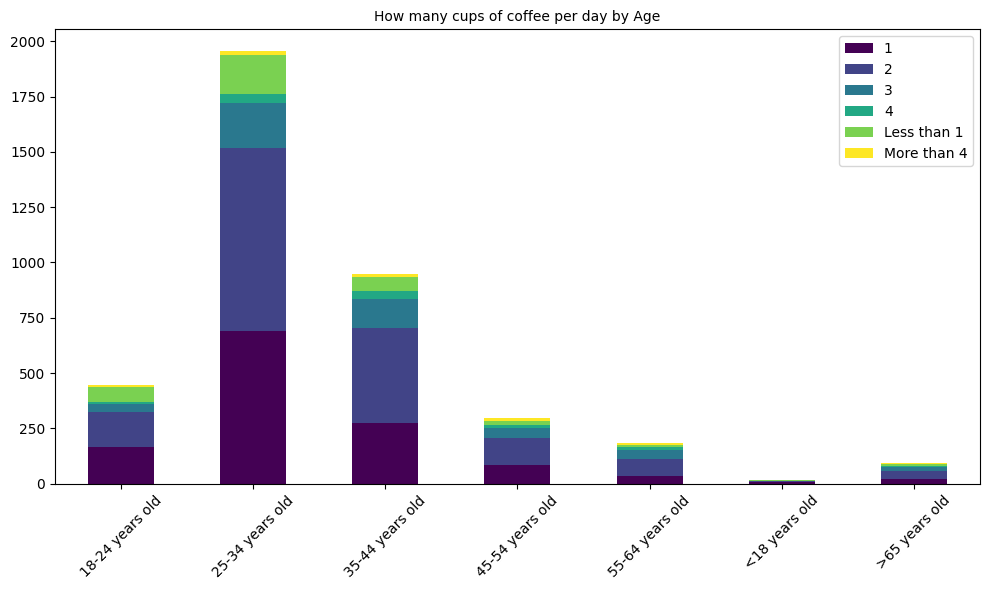

In [58]:
coffee_by_age.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

plt.title('How many cups of coffee per day by Age', fontsize=10)
plt.legend()
plt.xticks(rotation=45)
plt.xlabel('')
plt.tight_layout()

##### 연령대별로 선호하는 커피는 무엇인가?

In [35]:
coffee_by_age_group = pd.crosstab(df['What is your age?'], df['What is your favorite coffee drink?'])
print(coffee_by_age_group)

What is your favorite coffee drink?  Americano  \
What is your age?                                
18-24 years old                             26   
25-34 years old                            111   
35-44 years old                             75   
45-54 years old                             25   
55-64 years old                             10   
<18 years old                                0   
>65 years old                                1   

What is your favorite coffee drink?  Blended drink (e.g. Frappuccino)  \
What is your age?                                                       
18-24 years old                                                    11   
25-34 years old                                                    14   
35-44 years old                                                    15   
45-54 years old                                                     3   
55-64 years old                                                     1   
<18 years old                         

In [36]:
most_preferred_coffee = coffee_by_age_group.idxmax(axis=1)
print(most_preferred_coffee)

What is your age?
18-24 years old               Pourover
25-34 years old               Pourover
35-44 years old               Pourover
45-54 years old               Pourover
55-64 years old    Regular drip coffee
<18 years old                    Latte
>65 years old      Regular drip coffee
dtype: object


In [38]:
# 카이제곱 검정
chi2, p, dof, expected = chi2_contingency(coffee_by_age_group)

print(f"Chi-Square Test Statistic: {chi2}")
print(f"P-value: {p}")

Chi-Square Test Statistic: 184.9447125787479
P-value: 3.257030553142527e-13


검정 결과, 연령대와 선호하는 커피 종류는 상관관계가 있다.  

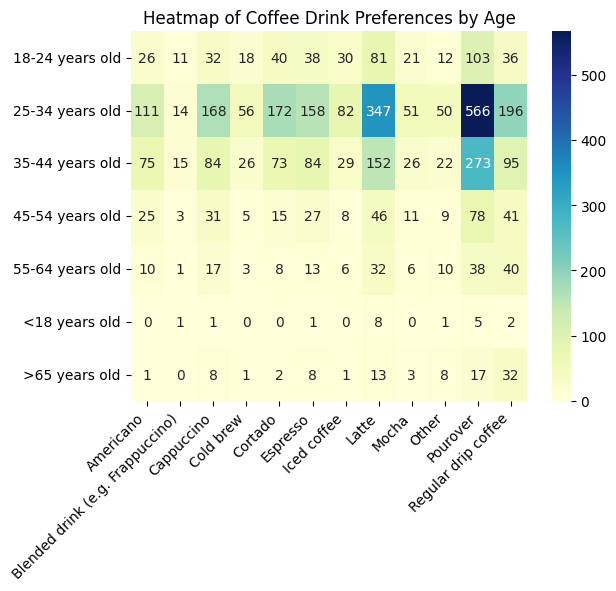

In [79]:
sns.heatmap(coffee_by_age_group, annot=True, fmt='d', cmap='YlGnBu')

plt.title('Heatmap of Coffee Drink Preferences by Age', fontsize=12)
plt.xlabel('')
plt.ylabel('')
_ = plt.xticks(rotation=45, ha='right')

##### 연령대별로 커피를 마시는 이유는?

In [47]:
coffee_reasons_by_age = pd.crosstab(df['What is your age?'], df['Why do you drink coffee?'])
print(coffee_reasons_by_age)

Why do you drink coffee?  I need the caffeine  \
What is your age?                               
18-24 years old                             8   
25-34 years old                            26   
35-44 years old                            18   
45-54 years old                             3   
55-64 years old                             6   
<18 years old                               0   
>65 years old                               1   

Why do you drink coffee?  I need the caffeine, I need the ritual  \
What is your age?                                                  
18-24 years old                                                0   
25-34 years old                                                7   
35-44 years old                                                3   
45-54 years old                                                6   
55-64 years old                                                6   
<18 years old                                                  0   
>65 years old 

In [44]:
# 문자열의 최대 길이를 설정하여 출력 시 잘리지 않도록 함
pd.set_option('display.max_colwidth', None)

most_reason_coffee = coffee_reasons_by_age.idxmax(axis=1)
print(most_reason_coffee)

What is your age?
18-24 years old                                            It tastes good
25-34 years old    It tastes good, I need the caffeine, I need the ritual
35-44 years old    It tastes good, I need the caffeine, I need the ritual
45-54 years old                                            It tastes good
55-64 years old                                            It tastes good
<18 years old                         It tastes good, I need the caffeine
>65 years old                                              It tastes good
dtype: object


In [45]:
# 카이제곱 검정
chi2, p, dof, expected = chi2_contingency(coffee_reasons_by_age)

print(f"Chi-Square Test Statistic: {chi2}")
print(f"P-value: {p}")

Chi-Square Test Statistic: 582.7494116552944
P-value: 0.005122723719486056


#### 전처리 데이터 저장하기

In [48]:
df3.to_csv('df3_output.csv', index=False)

#### Power BI